In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import scipy.io.wavfile

In [4]:
# Load audio signal
datafolder = '/Users/maxmaguire/Desktop/PostGradWork/DataFolder/SampleAudioFiles/'
fname = datafolder + '92002__jcveliz__violin-origional.wav'
rate, data = scipy.io.wavfile.read(fname)
# play audio signal
sd.play(data,rate)

(220500,)


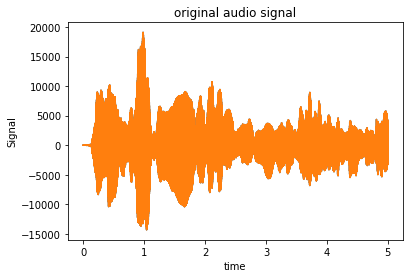

In [16]:
# Show original audio signal
ts = np.arange(len(data))/rate
plt.plot(ts,data)
plt.title('original audio signal')
plt.ylabel('Signal')
plt.xlabel('time')
plt.show()

In [17]:
# Define Helper Functions
def make_spectrum(datain, ratein):
    n = len(datain)
    d = 1 / ratein  # timestep
    # power spectral density
    hsout = np.fft.rfft(datain)
    # frequency spectrum
    freq = np.fft.rfftfreq(n, d)
    return hsout, freq

def make_wave(hsin):
    wave = np.fft.irfft(hsin)
    return wave

def low_pass(hslow, freq, cutoff, factor=0):
    hslow[freq > cutoff] *= factor
    return hslow

def high_pass(hshi, freq, cutoff, factor=0):
    hshi[freq < cutoff] *= factor
    return hshi

def stretch(ts,factor):
    ts /= factor
    return ts

/usr/local/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


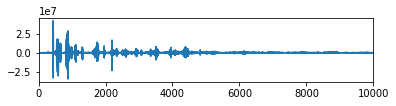

In [8]:
# Process Audio Signal
hs, freq = make_spectrum(data, rate)
# Visualize signal power Spectral density
fig = plt.figure(1)
plt.plot(freq,hs)
plt.xlim([0, 10000])
plt.show()

/usr/local/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


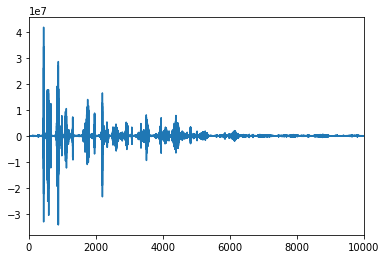

In [9]:
# Visualize signal power Spectral density
fig = plt.figure(1)
plt.plot(freq,hs)
plt.xlim([0, 10000])
plt.show()

/usr/local/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


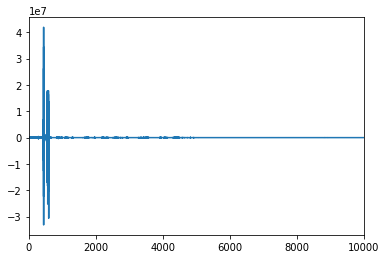

In [10]:
# Process Audio Signal
lowhs    = low_pass(np.copy(hs), freq, 600, 0.01)
hihs     = high_pass(np.copy(hs), freq, 2000, 0.01)
# Visualize signal power Spectral density
fig = plt.figure()
plt.plot(freq,lowhs)
plt.xlim([0, 10000])
plt.show()

In [11]:
# Listen for change
filteredLow = make_wave(lowhs)
filteredHi  = make_wave(hihs)
sd.play(np.round(filteredLow).astype('int16'), rate)

/usr/local/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


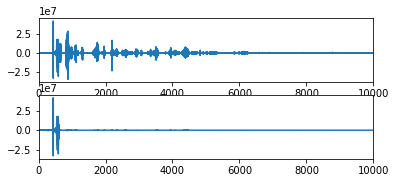

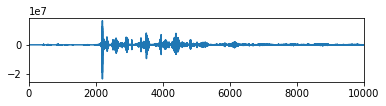

In [12]:
# Visualize change
# signal power Spectral density
fig = plt.figure(1)
plt.subplot(311)
plt.plot(freq, hs)
plt.xlim([0, 10000])
# low-pass filtered power Spectral density
plt.subplot(312)
plt.plot(freq, lowhs)
plt.xlim([0, 10000])
plt.show()
# hi-pass filtered power Spectral density
plt.subplot(313)
plt.plot(freq, hihs)
plt.xlim([0, 10000])
plt.show()

In [22]:
# Stretching the audio signal
factor = 0.7
ts_new = stretch(np.copy(ts),0.7)
rate_new = rate*factor

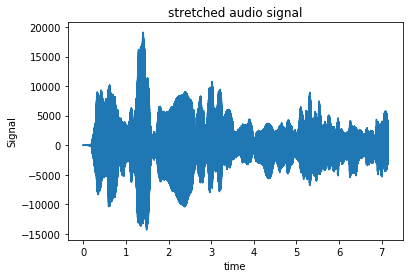

In [23]:
# Show stretched audio signal
plt.plot(ts_new,data)
plt.title('stretched audio signal')
plt.ylabel('Signal')
plt.xlabel('time')
plt.show()

In [24]:
# play audio signal
sd.play(data,rate_new)